Machine Learning - Mini-Project 2 (Dong Liu)

2 Q1

(1) Inherent Risk (Firm’s Historical Risk Score): A low historical risk score may sometimes be associated with a higher likelihood of future tax evasion, as firms with a clean compliance history might attract less regulatory scrutiny.

(2) Positive Revenue Growth (Past 2-3 Years): Steady revenue growth may indicate a lower likelihood of tax evasion, as financially stable companies are less pressured to engage in aggressive tax avoidance or fraudulent practices.

(3) Cash-Based Transactions: A high proportion of cash transactions may signal an increased risk of tax evasion.






2 Q2

In LPM, missing necessary interaction terms will cause bias. KNN is completely non-parametric, and it can naturally capture complex interaction terms without requiring explicit interaction terms in the model.



In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the data
audit = pd.read_csv('Data-Audit.csv')
audit.head()


,Sector_score,PARA_A,Risk_A,PARA_B,Risk_B,Money_Value,Risk_D,Score,Inherent_Risk,Audit_Risk,Risk
0,3.89,4.18,2.508,2.50,0.500,3.38,0.676,2.4,8.574,1.7148,1
1,3.89,0.00,0.000,4.83,0.966,0.94,0.188,2.0,2.554,0.5108,0
2,3.89,0.51,0.102,0.23,0.046,0.00,0.000,2.0,1.548,0.3096,0
3,3.89,0.00,0.000,10.80,6.480,11.75,7.050,4.4,17.530,3.5060,1
4,3.89,0.00,0.000,0.08,0.016,0.00,0.000,2.0,1.416,0.2832,0


In [3]:
# Lookup the missing values
print(audit.isna().sum())

# Display rows where Money_Value is missing
print(audit[audit["Money_Value"].isna()])

# Remove the rows with missing money value
audit.dropna(axis=0, subset= 'Money_Value', inplace=True)
print(f'remaining number of rows: {len(audit)}')


Sector_score     0
PARA_A           0
Risk_A           0
PARA_B           0
Risk_B           0
Money_Value      1
Risk_D           0
Score            0
Inherent_Risk    0
Audit_Risk       0
Risk             0
dtype: int64
     Sector_score  PARA_A  Risk_A  PARA_B  Risk_B  Money_Value  Risk_D  Score  \
642         55.57    0.23   0.046     0.0     0.0          NaN     0.0    2.0   

     Inherent_Risk  Audit_Risk  Risk  
642          1.446      0.2892     0  
remaining number of rows: 775


In [4]:
X = audit.drop(columns = ['Risk'])
y = audit.loc[:,'Risk']
display(X.head())
display(y.head())

,Sector_score,PARA_A,Risk_A,PARA_B,Risk_B,Money_Value,Risk_D,Score,Inherent_Risk,Audit_Risk
0,3.89,4.18,2.508,2.50,0.500,3.38,0.676,2.4,8.574,1.7148
1,3.89,0.00,0.000,4.83,0.966,0.94,0.188,2.0,2.554,0.5108
2,3.89,0.51,0.102,0.23,0.046,0.00,0.000,2.0,1.548,0.3096
3,3.89,0.00,0.000,10.80,6.480,11.75,7.050,4.4,17.530,3.5060
4,3.89,0.00,0.000,0.08,0.016,0.00,0.000,2.0,1.416,0.2832


0    1
1    0
2    0
3    1
4    0
Name: Risk, dtype: int64

In [5]:
# Check data types
X.dtypes

Sector_score     float64
PARA_A           float64
Risk_A           float64
PARA_B           float64
Risk_B           float64
Money_Value      float64
Risk_D           float64
Score            float64
Inherent_Risk    float64
Audit_Risk       float64
dtype: object

In [6]:
# Data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state = 13)

In [7]:
# Define and train the logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred_log = model.predict_proba(X_test)[:, 1] 




3(a)

In [8]:
# Continuous to binary predictions
y_pred_log_bin_1 = np.where(y_pred_log > 0.5, 1, 0)
y_pred_log_bin_1[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1])

In [9]:
# Confusion Matrix
cm_log_1 = confusion_matrix(y_test, y_pred_log_bin_1)
print(cm_log_1)

# Compute Accuracy
accuracy_log_1 = accuracy_score(y_test, y_pred_log_bin_1)
error_rate_log_1 = 1 - accuracy_log_1


[[226   3]
 [  3 156]]


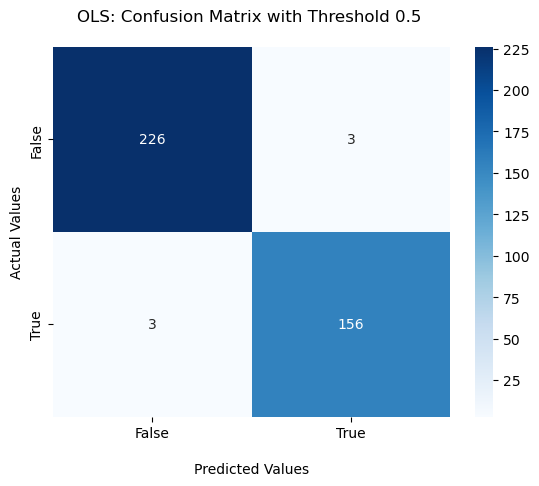

In [10]:
ax = sns.heatmap(cm_log_1, annot=True, 
            fmt='d', cmap='Blues')

ax.set_title('OLS: Confusion Matrix with Threshold 0.5 \n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

3(b)

In [11]:

# Continuous to binary predictions
y_pred_log_bin_2 = np.where(y_pred_log > 0.6, 1, 0)
y_pred_log_bin_2[:10]

# Confusion Matrix
cm_log_2 = confusion_matrix(y_test, y_pred_log_bin_2)
print(cm_log_2)

# Compute Accuracy
accuracy_log_2 = accuracy_score(y_test, y_pred_log_bin_2)
error_rate_log_2 = 1 - accuracy_log_2



[[228   1]
 [  4 155]]


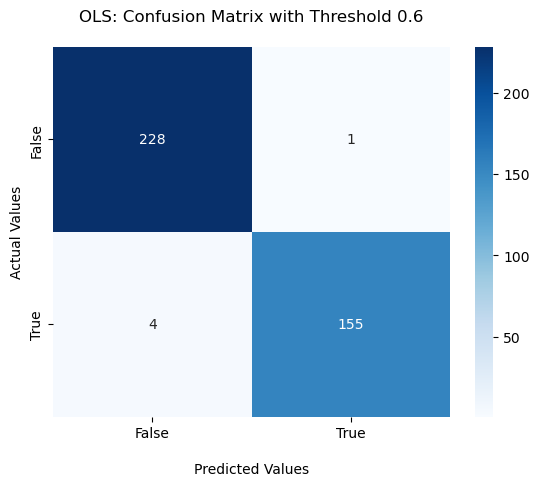

In [12]:
# Plot Confusion Matrix
ax = sns.heatmap(cm_log_2, annot=True, 
            fmt='d', cmap='Blues')

ax.set_title('OLS: Confusion Matrix with Threshold 0.6\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

3 (c)

In [13]:
# Print results
print(f"\nAccuracy with threshold 0.5: {accuracy_log_1 * 100:.2f}%")
print(f"Error Rate with threshold 0.5: {error_rate_log_1 * 100:.2f}%")

# Print results
print(f"\nAccuracy with threshold 0.6: {accuracy_log_2 * 100:.2f}%")
print(f"Error Rate with threshold 0.6: {error_rate_log_2 * 100:.2f}%")


Accuracy with threshold 0.5: 98.45%
Error Rate with threshold 0.5: 1.55%

Accuracy with threshold 0.6: 98.71%
Error Rate with threshold 0.6: 1.29%


Overall, the model with threshold 0.6 has higher accuracy.

3(d)  

The proportion of the firms predicted to evade their taxes actually evaded taxes is TP rate: 

The model with 0.5 threshold :  98.11 \%  
The model with 0.6 threshold : 99.36 \%


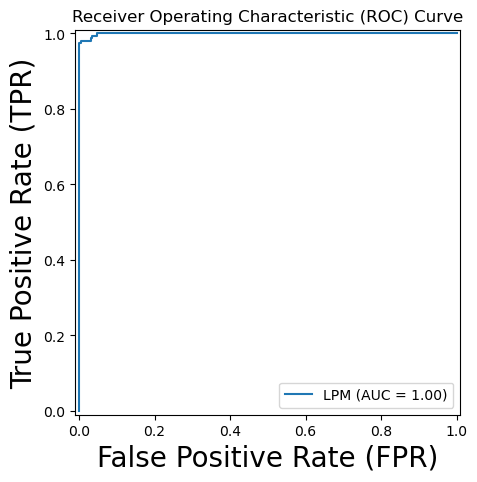

The AUC score is 99.93%


In [14]:
# plot ROC
fpr_audit, tpr_audit, thresholds_audit = roc_curve(y_test, y_pred_log)
auc_audit = roc_auc_score(y_test, y_pred_log)
roc_curve_audit = RocCurveDisplay(fpr=fpr_audit, tpr=tpr_audit, 
                                roc_auc=auc_audit,
                                estimator_name='LPM')


fig, ax = plt.subplots(figsize=(5, 5))
roc_curve_audit.plot(ax=ax)
ax.set_ylabel("True Positive Rate (TPR)", fontsize=20)
ax.set_xlabel("False Positive Rate (FPR)", fontsize=20)
ax.set_title("Receiver Operating Characteristic (ROC) Curve")
plt.show()

print(f"The AUC score is {auc_audit*100:.2f}%")



ROC visualize the tradeoff between the TPR and FPR at all possible decision thresholds, not only the 0.6 and 0.5 threshold we have compared.  
The ROC plot shows that the model contains high TPR rate while keeping the FPR rate low, indicating that the model perform well across differnt shresholds.  



Q4


In this context, the government prioritizes identifying firms with a high probability of tax evasion. False negatives (FN) are more concerning than false positives (FP) because:  

1. A false negative (FN) occurs when the model fails to detect a tax evader, undermining efforts to increase tax revenue.

2. A false positive (FP) leads to unnecessary audits, but the financial and administrative costs are relatively lower compared to the consequences of missing actual evaders.

Based on the ROC curve, the model effectively keeps the overall false positive rate low. 

Increasing the threadshold will increase the FN rate, while decreading the shredshold will increase the FP rate. Given the government’s focus on minimizing false negatives, I would recommend a lower shredshold in this case.

Part3 Q5

In [15]:
# Run KNN5
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
knn_5_prob = knn_5.predict_proba(X_test)[:, 1] 

# Apply 0.5 threshold
knn_5_pred = (knn_5_prob > 0.5).astype(int)

# Calculate Accuracy
accuracy_knn_5 = accuracy_score(y_test, knn_5_pred)
error_rate_knn_5 = 1 - accuracy_knn_5

5(a)
[[226   3]
 [ 11 148]]


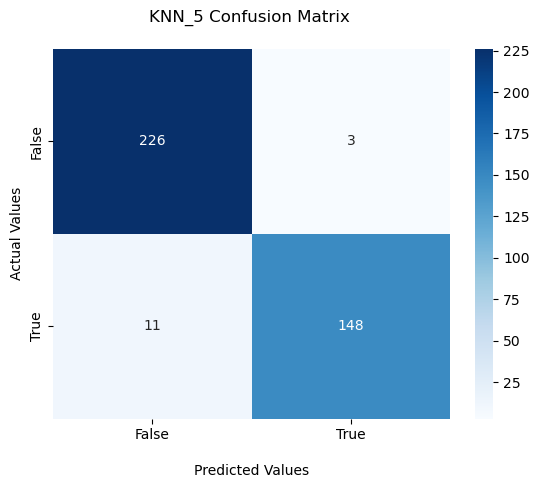

In [16]:

print('5(a)')

# Confusion Matrix
knn_5_cm = confusion_matrix(y_test, knn_5_pred)
print(knn_5_cm)

# Plot Confusion Matrix
ax = sns.heatmap(knn_5_cm, annot=True, 
            fmt='d', cmap='Blues')

ax.set_title('KNN_5 Confusion Matrix \n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()



In [17]:
print('5(b)')
# Print accuracy results

print(f"KNN 5 Error Rate: {error_rate_knn_5 * 100:.2f}%")
print(f"KNN 5 Overall acuracy: {accuracy_knn_5 * 100:.2f}%")



5(b)
KNN 5 Error Rate: 3.61%
KNN 5 Overall acuracy: 96.39%


5(c)

Under 5-neighbour KNN, the proportion of the firms predicted to evade their taxes actually evaded taxes: $\frac{148}{148+3}= 98.01\%$


6 (a)

In [18]:

scaler = StandardScaler()  # Initialize the scalar
X_scaled = scaler.fit_transform(X)  
print(type(X_scaled))  # Scaled data is returned as a numpy array; can’t pass this directly into test_train_split 
cols = X.columns  #  The array retains the same column order as the df, so extract the col names from X
X_final = pd.DataFrame(X_scaled, columns=cols)  # Convert X_scaled to a df using the column names of X
print(X_final.head())


# Data spliting
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_final, y, test_size=0.50, random_state = 13)


<class 'numpy.ndarray'>
   Sector_score    PARA_A    Risk_A    PARA_B    Risk_B  Money_Value  \
0     -0.669071  0.304129  0.335827 -0.166006 -0.194273    -0.161614   
1     -0.669071 -0.432005 -0.393216 -0.119482 -0.178777    -0.198271   
2     -0.669071 -0.342190 -0.363566 -0.211331 -0.209370    -0.212393   
3     -0.669071 -0.432005 -0.393216 -0.000278  0.004583    -0.035870   
4     -0.669071 -0.432005 -0.393216 -0.214326 -0.210368    -0.212393   

     Risk_D     Score  Inherent_Risk  Audit_Risk  
0 -0.190146 -0.353484      -0.166753   -0.141265  
1 -0.202356 -0.819385      -0.276733   -0.172402  
2 -0.207059 -0.819385      -0.295112   -0.177606  
3 -0.030676  1.976022      -0.003134   -0.094940  
4 -0.207059 -0.819385      -0.297523   -0.178289  


In [19]:
# Run KNN5 with scaled X
knn_5_scaled = KNeighborsClassifier(n_neighbors=5)
knn_5_scaled.fit(X_train_scaled, y_train)
knn_5_prob_scaled = knn_5_scaled.predict_proba(X_test_scaled)[:, 1]

# Apply 0.5 threshold
knn_5_pred_scaled = (knn_5_prob_scaled > 0.5).astype(int)

# Calculate Accuracy
accuracy_knn_5_scaled = accuracy_score(y_test, knn_5_pred_scaled)
error_rate_knn_5_scaled = 1 - accuracy_knn_5_scaled

[[222   7]
 [ 15 144]]


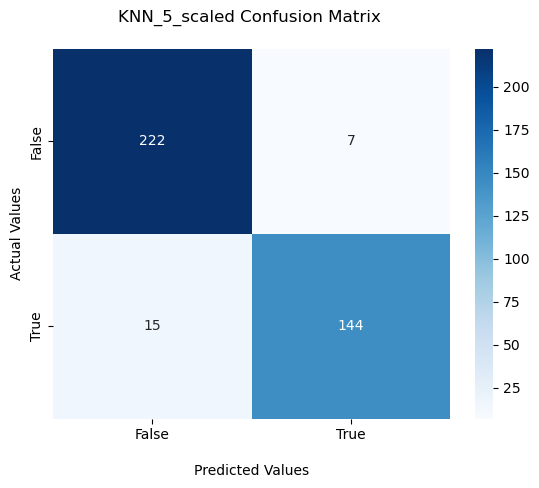

In [20]:
# Confusion Matrix
knn_5_scaled_cm = confusion_matrix(y_test, knn_5_pred_scaled)
print(knn_5_scaled_cm)

# Plot Confusion Matrix
ax = sns.heatmap(knn_5_scaled_cm, annot=True, 
            fmt='d', cmap='Blues')

ax.set_title('KNN_5_scaled Confusion Matrix \n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [21]:
print(f"KNN 5 scaled Error Rate: {error_rate_knn_5_scaled * 100:.2f}%")
print(f"KNN 5 scaled Overall acuracy: {accuracy_knn_5_scaled * 100:.2f}%")

KNN 5 scaled Error Rate: 5.67%
KNN 5 scaled Overall acuracy: 94.33%


6(c)
Using scaled data, the proportion of the firms predicted to evade their taxes actually evaded taxes: $\frac{144}{144+7}= 95.36\%$

7.
The model without scaling performs better in this case. It has higer overall accuracy, lower FNR and FPR. The reason that unscaled data makes better prediction could due to the predictors $x_i \in X$ with lower variation weight more in the true prediction function than those with higher variation. 

8. 

In [22]:
print(f"Total Sample Size: {len(y)}")
n = int(np.sqrt(len(y)))
print(n)
ks = list(range(1, 27, 2))  
para = {'n_neighbors': ks}
print(para)

Total Sample Size: 775
27
{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]}


In [23]:
# Initialize the KNN classifier
knni = KNeighborsClassifier()

# Set up 5-fold cross-validation scheme
kfcv = KFold(5, random_state=13, shuffle=True)
knn_cv = GridSearchCV(knni, para, cv=kfcv) 

# Fit the model
knn_cv.fit(X_train, y_train)
knn_cv_pred = knn_cv.predict(X_test)
knn_cv_pred_acc = accuracy_score(y_test, knn_cv_pred)

# Print the results
print("Best parameters :", knn_cv.best_params_)
print(f'Best cross validation score: {knn_cv.best_score_:.4f}')
print(f'Accuracy score:{ knn_cv_pred_acc:.4f}')

Best parameters : {'n_neighbors': 1}
Best cross validation score: 0.9639
Accuracy score:0.9588


Based on 5-fold cross validation, the model yields the best performance when $k=1$, with cross-valication score 96.39% and accuracy score 95.88 %.
It could due to the sample size is small, only 775, larger k could lead to underfitting. 

9.

In the long run, if the government relies too heavily on a KNN model with k=1, several issues may arise:  

Overfitting: The model is too flexible and may not generalize well.  

Limited Sample Size: With only 775 samples, the data may not represent the entire population.  

Bias in Detection: The model may miss tax evaders with different characteristics not captured in the training data.  